In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#dataset select
#df1 = pd.read_csv('LCA_Disclosure_Data_FY2022_Q2.csv')
#df2 = pd.read_csv('PW_Disclosure_Data_FY2022_Q2_revised_form.csv', low_memory=False)
df3 = pd.read_csv('PERM_Disclosure_Data_FY2022_Q2.csv', low_memory=False)

#df1.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#df2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df3.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE
0,A-19310-79633,Denied,2019-11-01,2021-10-01,N,NaN,NaN,N,"GGE CONSULTING ENGINEERS, INC.",5250 CALLAGHAN ROAD,...,Y,N,N,Y,N,ALFREDO LOZANO,ATTORNEY,ALOZANO@ABOGADOLOZANO.COM,JANICE LITTLE,VP FINANCE AND ADMINISTRATIVE
1,A-20053-22155,Certified-Expired,2020-02-22,2021-10-01,N,NaN,NaN,N,"CAPGEMINI AMERICA, INC.",333 W. WACKER DRIVE,...,Y,N,N,Y,N,Timothy G Payne,Partner,tpayne@sidley.com,Laura Heino,Supervising Associate
2,A-20084-34435,Certified-Expired,2020-03-30,2021-10-01,N,NaN,NaN,N,242 Business Inc. dba Time Mart 16,16145 FM 1485,...,Y,N,N,N,N,Anil R Ali,Attorney at Law,legal@anilalilaw.com,Karim Karedia,President
3,A-20076-31087,Denied,2020-04-13,2021-10-01,N,NaN,NaN,N,Dennis Bustamante,11855 NW 30TH ST,...,NaN,N,N,N,Y,,NaN,NaN,DENNIS BUSTAMANTE,HOUSEHOLDER
4,A-20156-61798,Denied,2020-07-08,2021-10-01,N,NaN,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,NaN,N,N,Y,N,Mustafa Amil,Staff Immigration Attorney,GoogleDOL@balglobal.com,Victoria Cheng,Global MobilityImmigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57528,A-21363-91853,Withdrawn,2022-03-29,2022-03-31,N,NaN,NaN,N,QUEST DIAGNOSTICS INCORPORATED,500 PLAZA DRIVE,...,NaN,NaN,N,Y,N,William A Stock,Attorney,wstock@klaskolaw.com,Fernando Reyes,Human Resources Immigration Specialist
57529,A-22087-31737,Withdrawn,2022-03-30,2022-03-31,N,NaN,NaN,N,AMAZON.COM SERVICES LLC,2250 7TH AVE,...,Y,N,N,Y,N,Scott Gregory,Attorney,HVPERM@dgilaw.com,DanielChongli Van Den HandelWu,HR Immigration
57530,A-22089-33322,Withdrawn,2022-03-31,2022-03-31,N,NaN,NaN,N,"TERRA LEGNO, LTD.",35 DALE AVE,...,NaN,NaN,N,N,N,Mauricio Martinez,Attorney,mmartinez@egsllp.com,Richmond Eshaghoff,President
57531,A-22090-33853,Withdrawn,2022-03-31,2022-03-31,N,NaN,NaN,N,"TERRA LEGNO, LTD.",35 DALE AVE,...,NaN,NaN,N,N,N,Mauricio Martinez,Attorney,mmartinez@egsllp.com,Richmond Eshaghoff,President


In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

1. dataset shpae

In [3]:
df1.shape

(275657, 96)

In [4]:
df2.shape

NameError: name 'df2' is not defined

In [3]:
df3.shape

(57533, 154)

1. dataset column select

In [4]:
df_main = df3
print(df_main.columns)
print(len(df_main.columns))

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'PREVIOUS_SWA_CASE_NUMBER_STATE',
       'SCHD_A_SHEEPHERDER', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       'EMPLOYER_ADDRESS_2', 'EMPLOYER_CITY', 'EMPLOYER_STATE_PROVINCE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'EMPLOYER_NUM_EMPLOYEES',
       'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'NAICS_CODE',
       'FW_OWNERSHIP_INTEREST', 'EMP_CONTACT_NAME', 'EMP_CONTACT_ADDRESS_1',
       'EMP_CONTACT_ADDRESS_2', 'EMP_CONTACT_CITY',
       'EMP_CONTACT_STATE_PROVINCE', 'EMP_CONTACT_COUNTRY',
       'EMP_CONTACT_POSTAL_CODE', 'EMP_CONTACT_PHONE', 'EMP_CONTACT_EMAIL',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_FIRM_NAME',
       'AGENT_ATTORNEY_PHONE', 'AGENT_ATTORNEY_PHONE_EXT',
       'AGENT_ATTORNEY_ADDRESS_1', 'AGENT_ATTORNEY_ADDRESS_2',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE_PROVINCE',
       'AGENT_ATTORNEY_COUNTRY

In [296]:
columns = ['EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 
      'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'FOREIGN_WORKER_YRS_ED_COMP', "PREVAILING_WAGE"]

#columns =["PREVAILING_WAGE","VISA_CLASS", "SOC_TITLE", "WORKSITE_STATE", "PW_WAGE_LEVEL"]

In [297]:

df_main = df_main[columns]
df_main["PREVAILING_WAGE"] = df_main["PREVAILING_WAGE"].str.replace(pat=r'$', repl=r'', regex=True)
df_main["PREVAILING_WAGE"] = df_main["PREVAILING_WAGE"].str.replace(pat=r',', repl=r'', regex=True)
df_main['PREVAILING_WAGE'] = pd.to_numeric(df_main['PREVAILING_WAGE'])
df_main =df_main.dropna(axis = 0)
df_main =df_main.dropna(axis = 1)

print(df_main.shape)

#exceptional case
df_main = df_main.loc[df_main["PREVAILING_WAGE"] > 500 ]

KeyError: "['REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'EMPLOYER_NUM_EMPLOYEES', 'FOREIGN_WORKER_YRS_ED_COMP'] not in index"

In [8]:
soc_list = df_main["SOC_TITLE"].values

In [9]:
soc_set = set(soc_list)
len(soc_set)

658

In [45]:
remove_title = []
for title in soc_set:
    if df_main.loc[df_main["SOC_TITLE"] == title].count()[1] < 10:
        remove_title.append(title)
    

In [46]:
len(remove_title)

626

In [47]:
for title in remove_title:
    df_main = df_main.loc[df_main["SOC_TITLE"] != title]


In [48]:
df_main.describe(include="all")

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE,PW_WAGE_LEVEL
count,209375.000000,209375,209375,209375,209375
unique,NaN,4,32,54,4
top,NaN,H-1B,"Software Developers, Applications",CA,II
freq,NaN,205993,80241,44989,90781
mean,104496.959001,NaN,NaN,NaN,NaN
std,30159.793734,NaN,NaN,NaN,NaN
min,762.800000,NaN,NaN,NaN,NaN
25%,82285.000000,NaN,NaN,NaN,NaN
50%,99590.000000,NaN,NaN,NaN,NaN
75%,121763.000000,NaN,NaN,NaN,NaN


LCA VISA 

In [265]:
df_e3 = df_main.loc[df["VISA_CLASS"] == "E-3 Australian"]
df_h = df_main.loc[df["VISA_CLASS"] == "H-1B"]
df_hc = df_main.loc[df["VISA_CLASS"] == "H-1B1 Chile"]
df_hs = df_main.loc[df["VISA_CLASS"] == "H-1B1 Singapore"]

In [277]:
df_main["PW_WAGE_LEVEL"].describe(include='all')

count     249345
unique         4
top           II
freq      104753
Name: PW_WAGE_LEVEL, dtype: object

LCA SOC_TITLE

In [190]:
df_Agri = df_main.loc[df_main["SOC_TITLE"] == 'Agricultural Inspectors']

In [191]:
df_Fina = df_main.loc[df_main["SOC_TITLE"] == "Financial Analysts" ]

In [204]:
df_Appl = df_main.loc[df_main["SOC_TITLE"] == "Software Developers, Applications" ]

In [264]:
df_syst = df_main.loc[df_main["SOC_TITLE"] == "Software Developers, Systems Software" ]

In [266]:
df_cai = df_main.loc[df_main["SOC_TITLE"] == "Computer and Information Systems Managers" ]

In [216]:
df_Appl.describe()

,PREVAILING_WAGE
count,83190.000000
mean,110168.568258
std,25362.376844
min,6659.450000
25%,91874.000000
50%,105040.000000
75%,125445.000000
max,217004.000000


LCA PREVAILING_WAGE

In [280]:
df_pw1 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'I']
df_pw2 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'II']
df_pw3 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'III']
df_pw4 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'IV']
#df_pw1 = df_main.loc[df["PW_WAGE_LEVEL"] == "I" ]
#df_pw2 = df_main.loc[df["PW_WAGE_LEVEL"] == "II"]
#df_pw3 = df_main.loc[df["PW_WAGE_LEVEL"] == "III"]
#df_pw4 = df_main.loc[df["PW_WAGE_LEVEL"] == "IV"]


In [237]:
df_pw1 = df_main.loc[df_main["PREVAILING_WAGE"] <= 78915 ]
df_pw2 = df_main.loc[(df_main["PREVAILING_WAGE"] >= 78915) & (df_main["PREVAILING_WAGE"] <= 121763)]
df_pw3 = df_main.loc[df_main["PREVAILING_WAGE"] > 121763 ]
df_sp = df_main.loc[df_main["PREVAILING_WAGE"] > 200000 ]



In [52]:
df_pw1.describe()

,PREVAILING_WAGE
count,43482.000000
mean,68462.877207
std,9893.833179
min,762.800000
25%,63794.000000
50%,70803.000000
75%,76066.000000
max,78915.000000


In [162]:
df_CA = df_main.loc[df["WORKSITE_STATE"] == "CA" ]
df_TX = df_main.loc[df["WORKSITE_STATE"] == "TX" ]
df_NY = df_main.loc[df["WORKSITE_STATE"] == "NY" ]
df_WA = df_main.loc[df["WORKSITE_STATE"] == "WA" ]
df_FL = df_main.loc[df["WORKSITE_STATE"] == "FL" ]


In [17]:
df.describe(include='all')

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE
count,13176.000000,13176,13176,13176
unique,NaN,4,435,55
top,NaN,H-1B,"Software Developers, Applications",CA
freq,NaN,12472,4102,2080
mean,41.964276,NaN,NaN,NaN
std,16.195762,NaN,NaN,NaN
min,7.250000,NaN,NaN,NaN
25%,32.817500,NaN,NaN,NaN
50%,41.270000,NaN,NaN,NaN
75%,48.920000,NaN,NaN,NaN


In [9]:
df_index=df
df_index.index


Int64Index([270823, 265421, 265420, 152010, 132540, 187987, 189313, 162856,
             16045,  89188,
            ...
            241526,  67460, 173468, 240948, 100208,  55078,    193, 150373,
            222955, 254390],
           dtype='int64', length=13177)

In [7]:
df= df.sort_values(by='PREVAILING_WAGE', ascending=False)

NameError: name 'df_index' is not defined

In [184]:
df_FL.describe()

,PREVAILING_WAGE
count,7389.000000
mean,86554.976106
std,29072.323238
min,709.200000
25%,70158.000000
50%,81744.000000
75%,101130.000000
max,300000.000000


In [179]:
df_CA.describe(include='all')

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE
count,57571.000000,57571,57571,57571
unique,NaN,4,407,1
top,NaN,H-1B,"Software Developers, Applications",CA
freq,NaN,55718,17567,57571
mean,127012.765163,NaN,NaN,NaN
std,35884.178832,NaN,NaN,NaN
min,1570.400000,NaN,NaN,NaN
25%,101192.000000,NaN,NaN,NaN
50%,126838.000000,NaN,NaN,NaN
75%,149915.500000,NaN,NaN,NaN


In [10]:
df.isnull()

,PUBLIC_DISCLOSURE
0,False
1,False
2,False
3,False
4,False
...,...
275652,False
275653,False
275654,False
275655,False


In [26]:
df.mode(axis = 0)

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE
0,130894.0,H-1B,"Software Developers, Applications",CA


plot data

In [267]:
df_plot = df_cai

In [274]:
df_plot.describe(include="all")

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE,PW_WAGE_LEVEL
count,6243.000000,6243,6243,6243,6243
unique,NaN,4,1,44,4
top,NaN,H-1B,Computer and Information Systems Managers,CA,II
freq,NaN,6059,6243,1693,2697
mean,162085.431004,NaN,NaN,NaN,NaN
std,36213.530550,NaN,NaN,NaN,NaN
min,7831.180000,NaN,NaN,NaN,NaN
25%,136718.000000,NaN,NaN,NaN,NaN
50%,156957.000000,NaN,NaN,NaN,NaN
75%,183914.000000,NaN,NaN,NaN,NaN


In [275]:
df_plot.describe()

,PREVAILING_WAGE
count,6243.000000
mean,162085.431004
std,36213.530550
min,7831.180000
25%,136718.000000
50%,156957.000000
75%,183914.000000
max,276328.000000


<AxesSubplot:xlabel='PREVAILING_WAGE', ylabel='Count'>

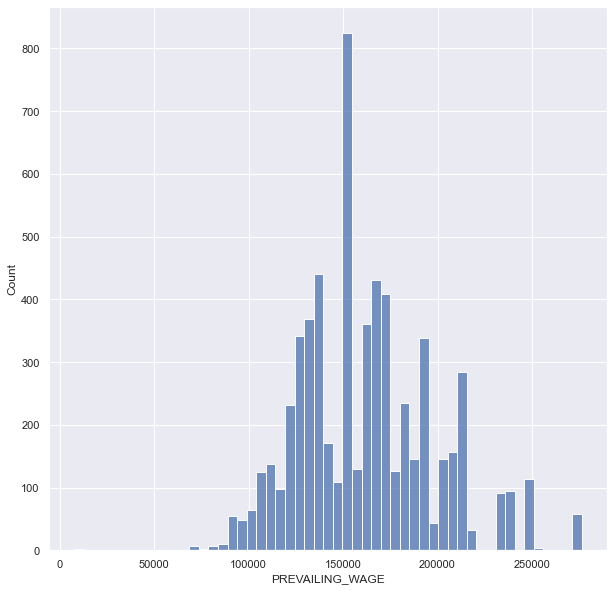

In [268]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale = 1)
sns.histplot(data=df_plot, x= "PREVAILING_WAGE")

<AxesSubplot:xlabel='Count', ylabel='WORKSITE_STATE'>

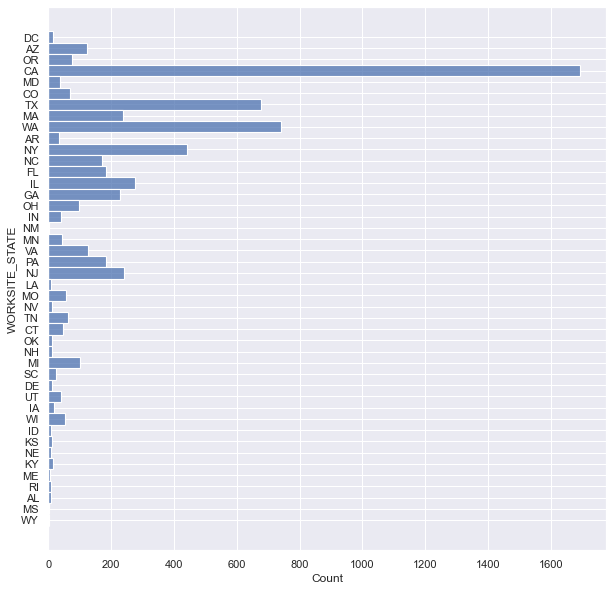

In [269]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale = 1)
sns.histplot(data=df_plot, y= "WORKSITE_STATE")

In [244]:
df_plot = df_main

In [272]:
frequency = df_plot["WORKSITE_STATE"].value_counts()
df_plot_pie = pd.DataFrame(frequency)

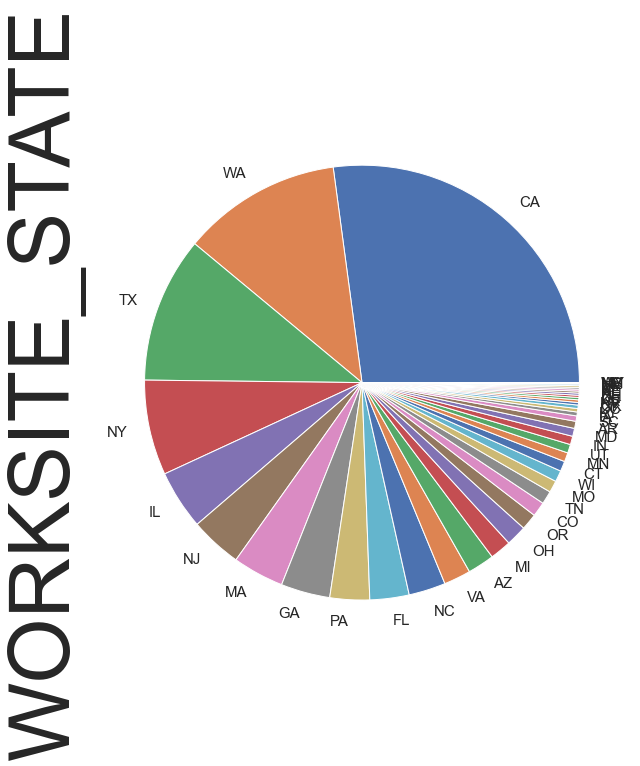

In [273]:
plot = df_plot_pie.plot.pie(y='WORKSITE_STATE', figsize=(10, 10), fontsize = 15, legend = 0)

<AxesSubplot:xlabel='Count', ylabel='SOC_TITLE'>

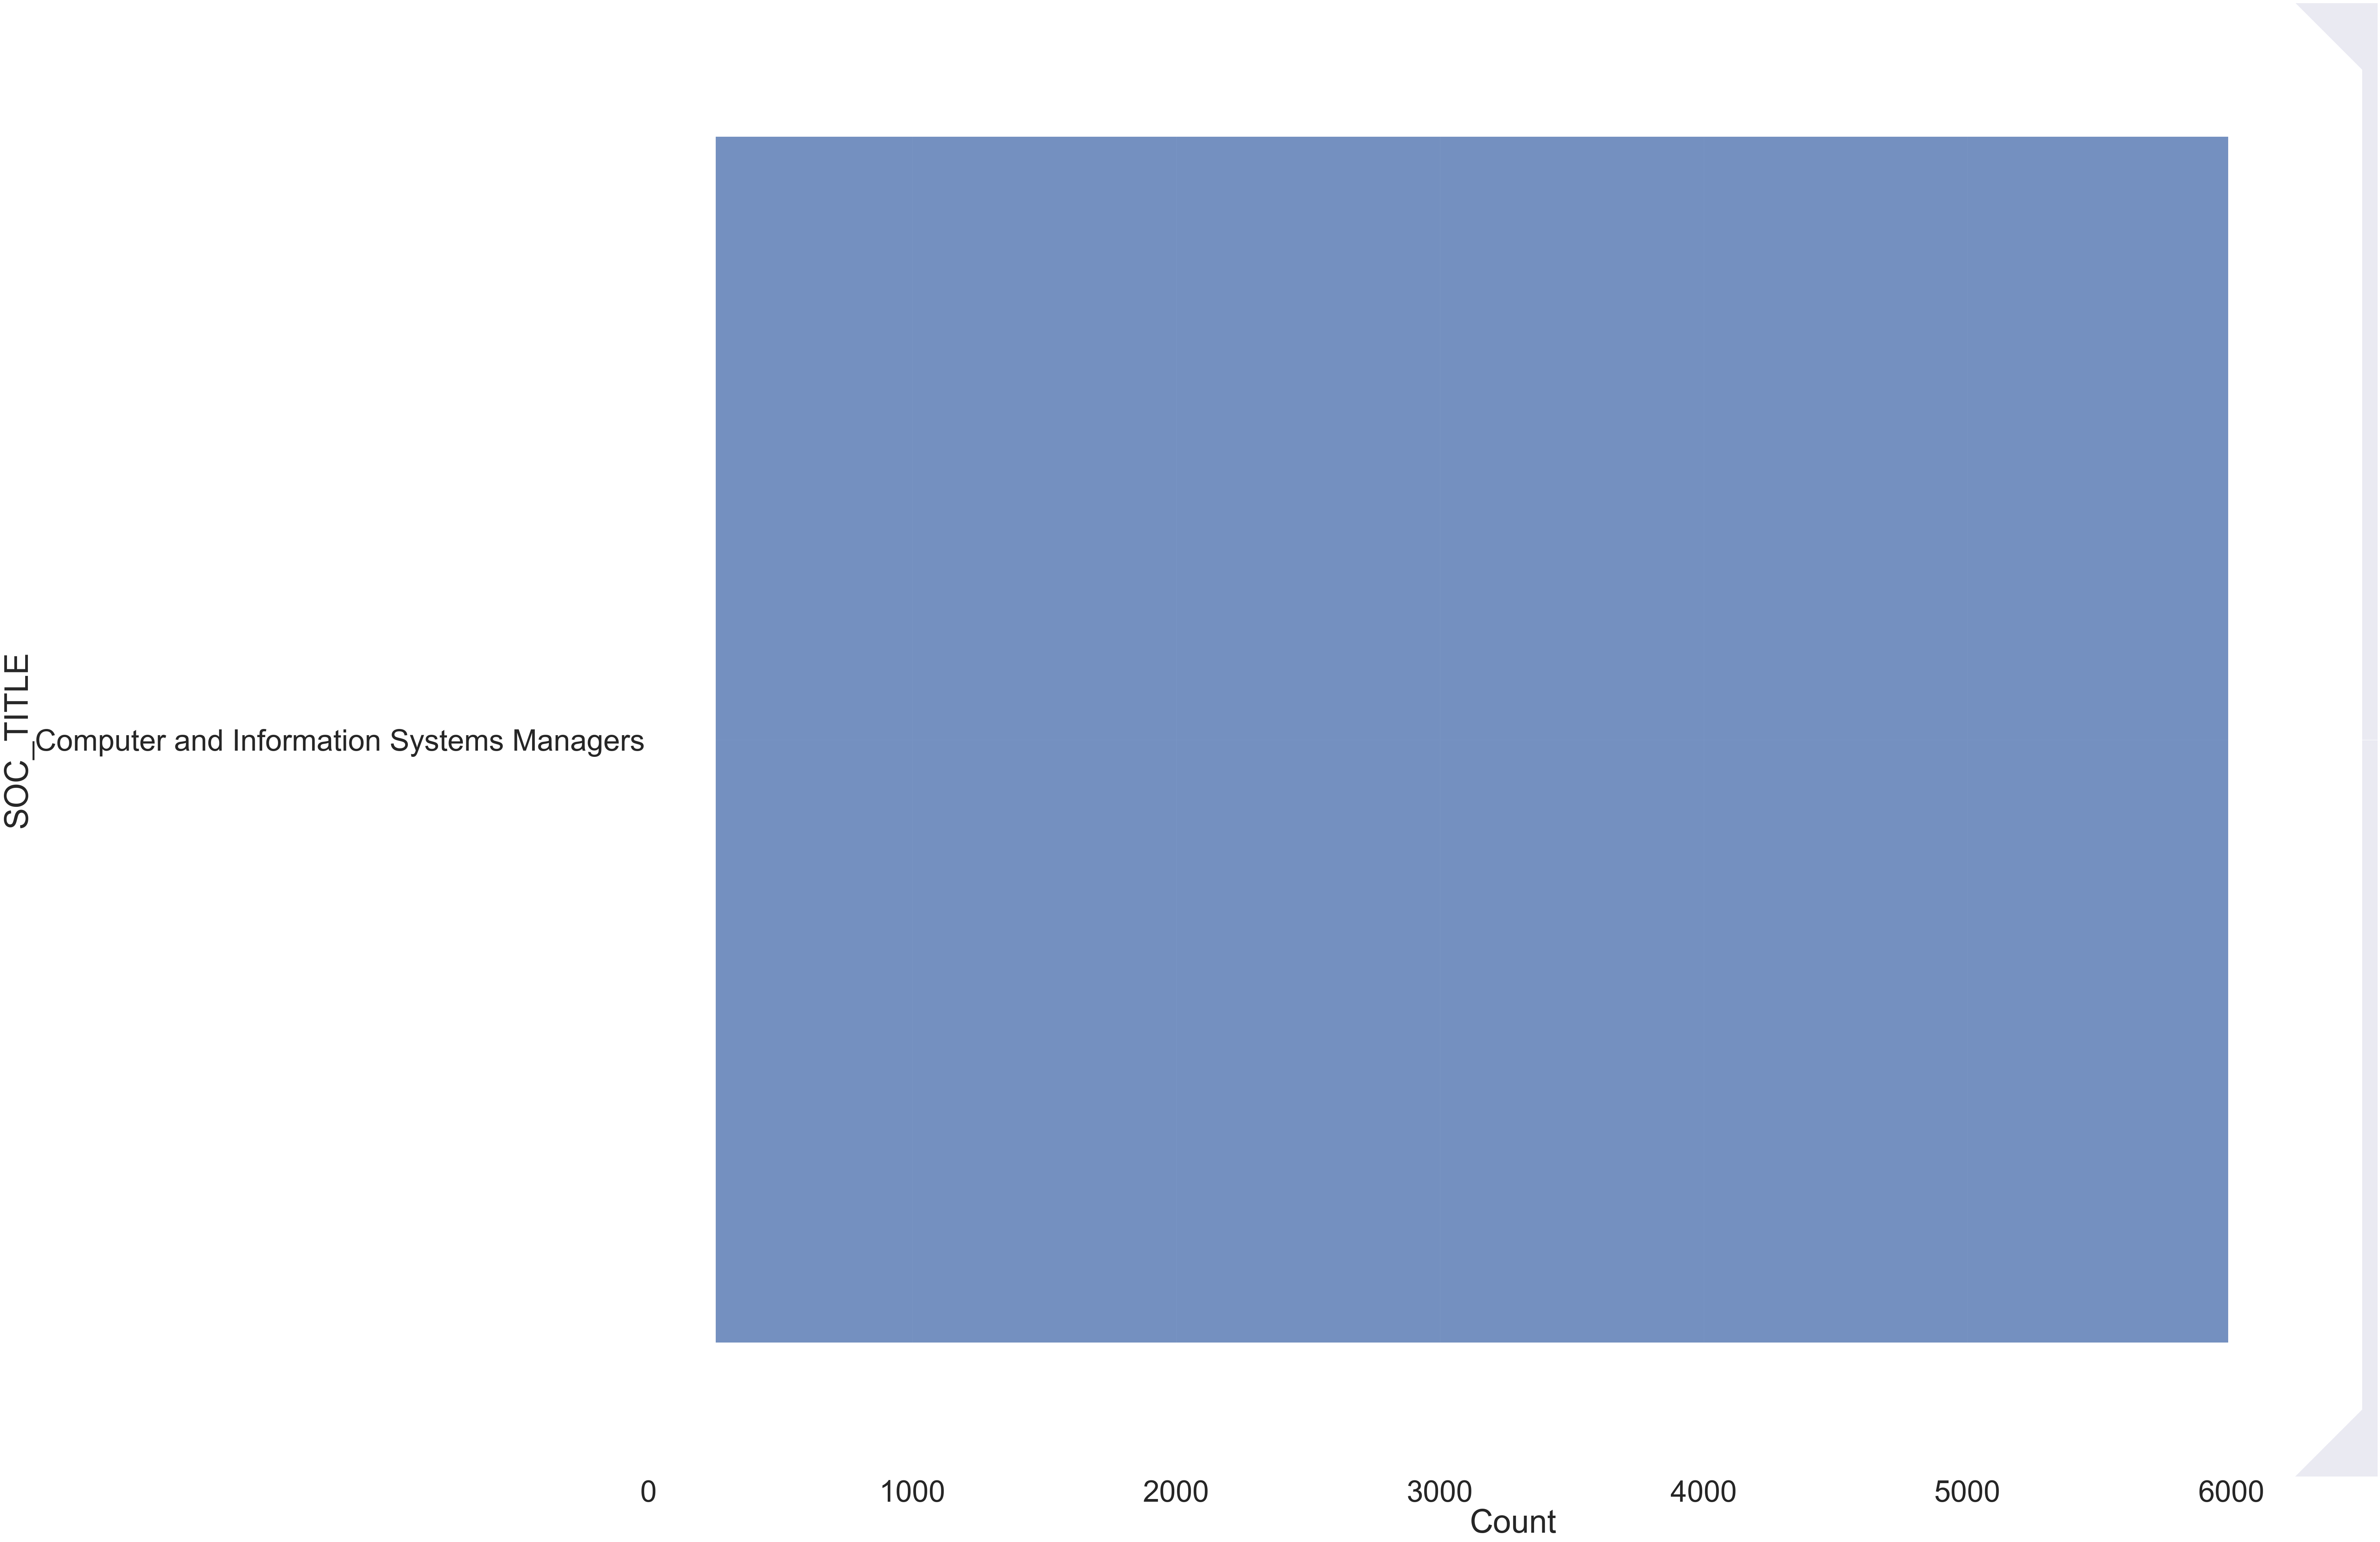

In [270]:
sns.set(rc={'figure.figsize':(80,70)}, font_scale = 7)
sns.histplot(data=df_plot, y= "SOC_TITLE")

<AxesSubplot:xlabel='SOC_TITLE', ylabel='Count'>

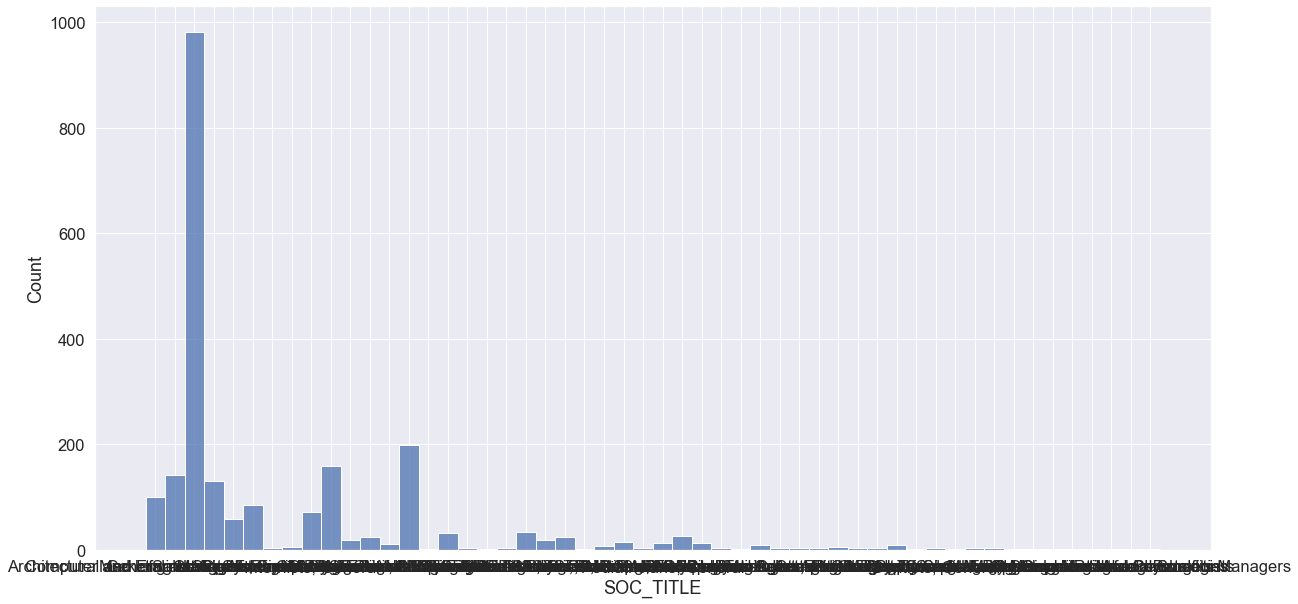

In [258]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale = 1.5)
sns.histplot(data=df_plot, x = "SOC_TITLE")

In [113]:
string = "Hey! What's up?"
string = re.sub("\!|\'|\?","",string)
print(string)


Hey Whats up


In [21]:
wage = ['PREVAILING_WAGE', 'PW_UNIT_OF_PAY' , 'PW_TRACKING_NUMBER', 'PW_WAGE_LEVEL', 'PW_OES_YEAR', 'PW_OTHER_SOURCE', 'PW_OTHER_YEAR',
'PW_SURVEY_PUBLISHER', 'PW_SURVEY_NAME']


num = ['TOTAL_WORKER_POSITIONS' ,'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'NAICS_CODE', 'WORKSITE_WORKERS', 'PW_OTHER_YEAR', 'TOTAL_WORKSITE_LOCATIONS']

In [58]:
num = ['NAICS_CODE', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ALT_TRAINING_MONTHS', 'ALT_EXPERIENCE_MONTHS'
      , 'ALT_PWD_WAGE_RATE']

In [285]:
num = ['EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 
      'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'FOREIGN_WORKER_YRS_ED_COMP', "PREVAILING_WAGE"]

In [292]:
df_main.describe()

,PREVAILING_WAGE
count,249345.000000
mean,102271.253935
std,33182.971215
min,709.200000
25%,78915.000000
50%,97760.000000
75%,121451.000000
max,306530.000000


In [291]:

corr = df_main[num].corr(method = 'pearson') #피어슨 상관계수를 구하는 것

fig = plt.figure(figsize = (16, 12)) #시각화
ax = fig.gca()

sns.set(font_scale=1.5) # seaborn library font 설정
hm = sns.heatmap(corr.values,#heatmap 사용
                 annot=True, 
                 fmt='.2f', #소수점 2번째 자리
                 annot_kws={'size': 15},
                 yticklabels=num,
                 xticklabels=num,
                 ax=ax)
plt.tight_layout() #창에 딱 맞게 설정
plt.show()

KeyError: "['REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'EMPLOYER_NUM_EMPLOYEES', 'FOREIGN_WORKER_YRS_ED_COMP'] not in index"

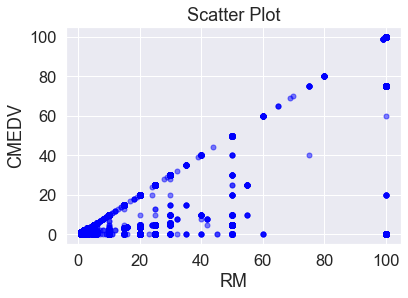

In [14]:
plt.plot('TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()